## SVM Assignment (Machine Learning MII-3411)
Kelompok :
- Juandito Batara (18/427582/PA/18542)
- Mario Adriel (18/430267/PA/18780)
- Francisca C. S. (18/427578/PA/18538)

In [67]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import os
from pathlib import Path
import cv2
import random
from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import roc_curve, auc

## Import dataset and preprocess

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_path = Path('/content/gdrive/My Drive/dataset/flowers/')
DATA_PATH:str = '/content/gdrive/My Drive/dataset/flowers/'
classes:list = os.listdir(DATA_PATH)
width:int = 320
height:int = 240

print("3 kelas: ", classes)

3 kelas:  ['sunflower', 'rose', 'dandelion']


In [55]:
# Create DataFrame by listing image directory and its class

flowers = []
for types in classes:
    semua_bunga = os.listdir(data_path / types)
    for flower in semua_bunga:
        flowers.append((types, str(data_path /types) + '/' + flower))
      
flowers = pd.DataFrame(data=flowers, columns=['class', 'image name'], index=None)
flowers.head()

,class,image name
0,dandelion,/content/gdrive/My Drive/dataset/flowers/dande...
1,dandelion,/content/gdrive/My Drive/dataset/flowers/dande...
2,dandelion,/content/gdrive/My Drive/dataset/flowers/dande...
3,dandelion,/content/gdrive/My Drive/dataset/flowers/dande...
4,dandelion,/content/gdrive/My Drive/dataset/flowers/dande...


In [56]:
print("Jumlah semua bunga dalam dataset : ", len(flowers))
fl_count = flowers['class'].value_counts()
print("Bunga dalam setiap kategori: ")
print(fl_count)

Jumlah semua bunga dalam dataset :  300
Bunga dalam setiap kategori: 
dandelion    100
sunflower    100
rose         100
Name: class, dtype: int64


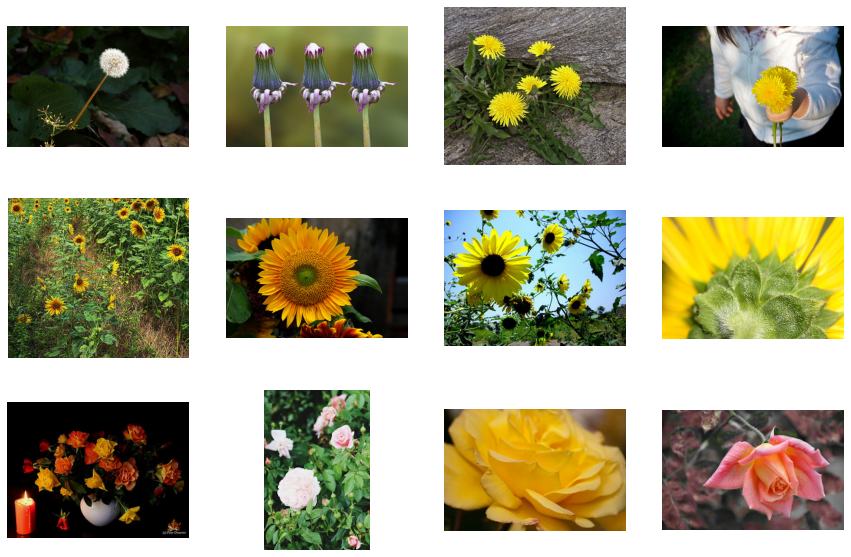

In [57]:
# Visualizing image previews

random_samples = []

for category in fl_count.index:
    samples = flowers['image name'][flowers['class'] == category].sample(4).values
    for sample in samples:
        random_samples.append(sample)

f, ax = plt.subplots(3,4, figsize=(15,10))
for i,sample in enumerate(random_samples):
    ax[i//4, i%4].imshow(mimg.imread(random_samples[i]))
    ax[i//4, i%4].axis('off')
plt.show()    

In [144]:
images:list = []
labels:list = []
np_img:list = []

classLabel = [0,1,2]
a = 0
for i in classes:
  label_path:str = DATA_PATH + i
  for image_file in os.listdir(label_path)[:100]:
    image = cv2.imread(label_path + '/' + image_file, cv2.IMREAD_UNCHANGED)
    image = cv2.resize(image, (320, 240), interpolation=cv2.INTER_LINEAR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = image / 255.0
    image_input = image.flatten()
    images.append(image)
    np_img.append(image_input)
    labels.append(classLabel[a])
  a += 1
np_img = np.array(np_img)

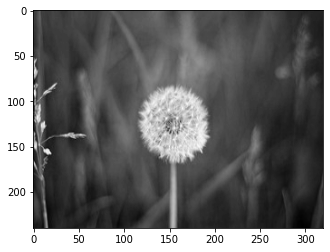

In [145]:
plt.imshow(images[0], cmap='gray')
plt.show()

In [153]:
images = np.array(images).reshape(-1, height, width, 1)

labels = np.array(labels)

## Split and reshape

In [137]:
def split_data(X:list, y:list):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
  
  return X_train, X_test, y_train, y_test

In [138]:
X_train, X_test, y_train, y_test = split_data(images, labels)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(240, 240, 320, 1)
(240,)
(60, 240, 320, 1)
(60,)


## SVM

In [139]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_train = X_train
y_train = y_train

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
X_test = X_test
y_test = y_test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 76800)
(60, 76800)
(240,)
(60,)


In [163]:
svm_model = SVC(kernel='rbf', probability=True, verbose=True)
svm_model.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=True)

In [164]:
lin_model_1 = LinearSVC(multi_class='ovr', verbose=1)
lin_model_2 = LinearSVC(multi_class='crammer_singer', verbose=1)

lin_model_1.fit(X_train, y_train)
lin_model_2.fit(X_train, y_train)

[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='crammer_singer', penalty='l2', random_state=None,
          tol=0.0001, verbose=1)

In [165]:
y_pred = svm_model.predict(X_test)
y_pred_lin_1 = lin_model_1.predict(X_test)
y_pred_lin_2 = lin_model_2.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
lin_accuracy_1 = accuracy_score(y_test, y_pred_lin_1)
lin_accuracy_2 = accuracy_score(y_test, y_pred_lin_2)
print('SVM Model accuracy is: ', accuracy)
print('Linear SVM Model 1 accuracy is: ', lin_accuracy_1)
print('Linear SVM Model 2 accuracy is: ', lin_accuracy_2)

SVM Model accuracy is:  0.4166666666666667
Linear SVM Model 1 accuracy is:  0.31666666666666665
Linear SVM Model 2 accuracy is:  0.3


Text(0.5, 0, 'False Positive Rate')

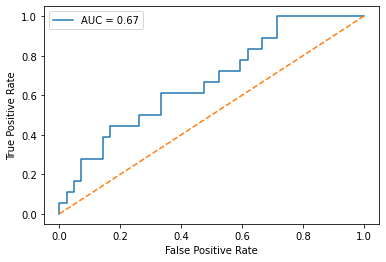

In [166]:
# predict probabilities for X_test using predict_proba
probabilities_1 = svm_model.predict_proba(X_test)

# select the probabilities for label 1.0
y_proba = probabilities_1[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Optional - Using StandardScaler and PCA

In [ ]:
images = np.array(images).reshape(-1, height, width, 1)

labels = np.array(labels)

In [154]:
images_1 = images.reshape(images.shape[0], images.shape[1]*images.shape[2])
print(images_1.shape)

(300, 76800)


In [155]:
ss = StandardScaler()
ss_img = ss.fit_transform(images_1)

pca = PCA()
pca_img = pca.fit_transform(ss_img)
print('PCA matrix shape is: ', pca_img.shape)

PCA matrix shape is:  (300, 300)


In [156]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = split_data(pca_img, labels)

print(X_train_pca.shape)
print(y_train_pca.shape)
print(X_test_pca.shape)
print(y_test_pca.shape)

(240, 300)
(240,)
(60, 300)
(60,)


In [161]:
svm_model_pca = SVC(kernel='rbf', probability=True, verbose=True)
lin_model_1_pca = LinearSVC(multi_class='ovr', verbose=1)
lin_model_2_pca = LinearSVC(multi_class='crammer_singer', verbose=1)

svm_model_pca.fit(X_train_pca, y_train_pca)
lin_model_1_pca.fit(X_train_pca, y_train_pca)
lin_model_2_pca.fit(X_train_pca, y_train_pca)

[LibSVM][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='crammer_singer', penalty='l2', random_state=None,
          tol=0.0001, verbose=1)

In [162]:
y_pred_pca = svm_model_pca.predict(X_test_pca)
y_pred_lin_pca_1 = lin_model_1_pca.predict(X_test_pca)
y_pred_lin_pca_2 = lin_model_2_pca.predict(X_test_pca)

accuracy = accuracy_score(y_test_pca, y_pred_pca)
lin_accuracy_1 = accuracy_score(y_test_pca, y_pred_lin_pca_1)
lin_accuracy_2 = accuracy_score(y_test_pca, y_pred_lin_pca_2)
print('SVM Model accuracy is: ', accuracy)
print('Linear SVM Model 1 accuracy is: ', lin_accuracy_1)
print('Linear SVM Model 2 accuracy is: ', lin_accuracy_2)

SVM Model accuracy is:  0.5333333333333333
Linear SVM Model 1 accuracy is:  0.38333333333333336
Linear SVM Model 2 accuracy is:  0.45


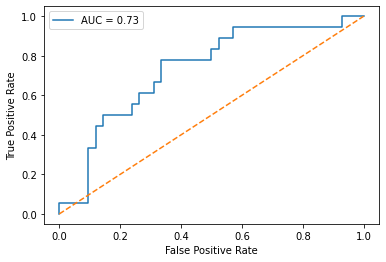

In [159]:
# predict probabilities for X_test using predict_proba
probabilities = svm_model_pca.predict_proba(X_test_pca)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_pca, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');